## Noa Prada Schnor

###  PIMA INDIANS DIABETES DATASET

The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes <sup>1</sup>: 


	Pregnancies (number of times pregnant), 

	Oral glucose tolerance test (plasma glucose concentration at 2 h), 

	Blood Pressure (Diastolic Blood Pressure in mmHg), 

	Skin Thickness (Triceps skin fold thickness in mm), 

	Insulin (2 h serum insulin in mu U/ml), 

	BMI (Body Mass Index in kg/m2), 

	Age (years).

### PIMA INDIANS AND DIABETES

Pima are descendants of people that inhabited the Sonoran desert and Sierra Madre areas for centuries. Around 300 B.C. they moved to Gila River Valley at the time  in Mexico, but region that was acquired by the United States in 1853. A Pima reservation was created in Arizona in 1959 and they adapted to their desert homeland by directing water to support a subsistence agriculture. Around 1900 the number of population of white settlers increased and a diversion of the water happened. That had an impact of Pima's food intake and way of life. Pima Indians used to farm sustained through physical labour to a little labour and scarce of food. As a consequence they food intake became high in fat and their lifestyle was mainly sedentary. That resulted in development of diabetes among the Arizona Pimas. By the 1950's the prevalence of diabetes among Pima Indians <sup>2</sup>.
The Pima population has been under study by the National Institute of Diabetes and Digestive and Kidney Diseases since 1965.

### TRICEPS SKIN FOLD THICKNESS

Triceps skinfold thickness in millimeters for females aged 20 and over and number of examined persons, mean, standard error of the mean, and selected percentiles, by race and ethnicity and age: United States, 2007–2010 <sup>3</sup>.

<a href="https://ibb.co/4NDNNx1"><img src="https://i.ibb.co/KyQyyHK/table-triceps-skin-fold.png" alt="table-triceps-skin-fold" border="0"></a>

### BODY  WEIGHT AND DIABETES

Obesity is associated with diabetes. Therefore, they are intimately linked <sup>4,5</sup>. In fact, most of the individuals with type 2 diabetes mellitus (T2DM) are overweight or obese 5.  Despite the link between obesity and T2DM not all obese develops diabetes and not all diabetics are obese people. Diabetic lean people probably have a stronger genetic component for T2DM than overweight and obese individuals <sup>5</sup>.

## OBJECTIVE

The objective of this project is to help health professionals to make diagnosis easier by applying machine learning techniques resulting in bridging the gap between datasets and human knowledge. In this project I will apply machine learning techniques in Pima Indian Diabetes Dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

In [3]:
pima = pd.read_csv(url)

In [4]:
pima.head (10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Check missing values

pima.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [6]:
pima.shape

(768, 9)

In [7]:
Nutritional_status = pd.Series([]) 

In [8]:
# Nutritional status based on BMI

for i in range(len(pima)): 
    if pima['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif pima['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif pima['BMI'][i] >= 25 and pima['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif pima['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= pima['BMI'][i] 

In [9]:
# Insert new column - Nutritional Status
pima.insert(6, "Nutritional Status", Nutritional_status)

In [10]:
# Check df containing new column
pima.head (10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1
5,5,116,74,0,0,25.6,Overweight,0.201,30,0
6,3,78,50,32,88,31.0,Obese,0.248,26,1
7,10,115,0,0,0,35.3,Obese,0.134,29,0
8,2,197,70,45,543,30.5,Obese,0.158,53,1
9,8,125,96,0,0,0.0,NA,0.232,54,1


In [11]:
Percentile_skin_thickness = pd.Series([]) 

In [12]:
#  Check skin fold thickness Percentile

for i in range(len(pima)): 
    
    
    if pima["Age"][i] >= 20.0 and pima["Age"][i] <= 79.0: 
        
        if pima["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]="NA"
    
        elif pima["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="<P5th"
        
        elif pima["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="P5th"
        
        elif pima["SkinThickness"][i] > 11.9 and pima["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="P5th - P10th"
        
        elif pima["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="P10th"
        
        elif pima["SkinThickness"][i] > 14.0 and  pima["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="P10th - P15th"
        
        elif pima["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="P15th"
    
        elif pima["SkinThickness"][i] > 15.8 and pima["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="P15th - P25th"
    
        elif pima["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="P25th"
        
        elif pima["SkinThickness"][i] > 18.0 and pima["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="P25th - P50th"
   
        elif pima["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="P50th"
        
        elif pima["SkinThickness"][i] > 23.5 and pima["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="P50th - P75th"
        
        elif pima["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="P75th"
        
        elif pima["SkinThickness"][i] > 29.0 and pima["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="P75th - P85th"
        
        elif pima["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="P85th"
        
        elif pima["SkinThickness"][i] > 31.9 and pima["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="P85th - P90th"
    
        elif pima["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="P90th"
        
        elif pima["SkinThickness"][i] > 33.7 and pima["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="P90th - P95th"
    
        elif pima["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="P95th"
        
        elif pima["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="> P95th"
            
    elif pima["Age"][i] >= 80.0: 
        if pima["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]="NA"
    
        elif pima["SkinThickness"][i] < 9.4: 
            Percentile_skin_thickness[i]="<P5th"
        
        elif pima["SkinThickness"][i] == 9.4: 
            Percentile_skin_thickness[i]="P5th"
        
        elif pima["SkinThickness"][i] > 9.4 and pima["SkinThickness"][i] < 11.2: 
            Percentile_skin_thickness[i]="P5th - P10th"
        
        elif pima["SkinThickness"][i] == 11.2: 
            Percentile_skin_thickness[i]="P10th"
        
        elif pima["SkinThickness"][i] > 11.2 and pima["SkinThickness"][i] < 12.4: 
            Percentile_skin_thickness[i]="P10th - P15th"
        
        elif pima["SkinThickness"][i] == 12.4: 
            Percentile_skin_thickness[i]="P15th"
    
        elif pima["SkinThickness"][i] > 12.4 and pima["SkinThickness"][i] < 14.7: 
            Percentile_skin_thickness[i]="P15th - P25th"
    
        elif pima["SkinThickness"][i] == 14.7: 
            Percentile_skin_thickness[i]="P25th"
        
        elif pima["SkinThickness"][i] > 14.7 and pima["SkinThickness"][i] < 19.0: 
            Percentile_skin_thickness[i]="P25th - P50th"
   
        elif pima["SkinThickness"][i] == 19.0: 
            Percentile_skin_thickness[i]="P50th"
        
        elif pima["SkinThickness"][i] > 19.0 and pima["SkinThickness"][i] < 23.2: 
            Percentile_skin_thickness[i]="P50th - P75th"
        
        elif pima["SkinThickness"][i] == 23.2: 
            Percentile_skin_thickness[i]="P75th"
        
        elif pima["SkinThickness"][i] > 23.2 and pima["SkinThickness"][i] < 25.9: 
            Percentile_skin_thickness[i]="P75th - P85th"
        
        elif pima["SkinThickness"][i] == 25.9: 
            Percentile_skin_thickness[i]="P85th"
        
        elif pima["SkinThickness"][i] > 25.9 and pima["SkinThickness"][i] < 27.8: 
            Percentile_skin_thickness[i]="P85th - P90th"
    
        elif pima["SkinThickness"][i] == 27.8: 
            Percentile_skin_thickness[i]="P90th"
        
        elif pima["SkinThickness"][i] > 27.8 and pima["SkinThickness"][i] < 31.7: 
            Percentile_skin_thickness[i]="P90th - P95th"
    
        elif pima["SkinThickness"][i] == 31.7: 
            Percentile_skin_thickness[i]="P95th"
        
        elif pima["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="> P95th"


In [13]:
# Insert new column - High glucose (>=200)
pima.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [14]:
pima.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Percentile skin thickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,P90th - P95th,0,33.6,Obese,0.627,50,1
1,1,85,66,29,P75th,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,NA,0,23.3,Normal,0.672,32,1
3,1,89,66,23,P25th - P50th,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,P90th - P95th,168,43.1,Obese,2.288,33,1
5,5,116,74,0,NA,0,25.6,Overweight,0.201,30,0
6,3,78,50,32,P85th - P90th,88,31.0,Obese,0.248,26,1
7,10,115,0,0,NA,0,35.3,Obese,0.134,29,0
8,2,197,70,45,> P95th,543,30.5,Obese,0.158,53,1
9,8,125,96,0,NA,0,0.0,NA,0.232,54,1


In [15]:
# Minimum

In [16]:
pima.min()

Pregnancies                      0
Glucose                          0
BloodPressure                    0
SkinThickness                    0
Percentile skin thickness    <P5th
Insulin                          0
BMI                              0
Nutritional Status              NA
DiabetesPedigreeFunction     0.078
Age                             21
Outcome                          0
dtype: object

In [17]:
# It can be noticed that some of women don't have information about some of the attributes, such as glucose, blood pressure, etc as the minimum value is zero. Besides, only adult women were included as the minimum age is 21 years old.

In [18]:
# Maximum

In [19]:
pima.max()

Pregnancies                             17
Glucose                                199
BloodPressure                          122
SkinThickness                           99
Percentile skin thickness    P90th - P95th
Insulin                                846
BMI                                   67.1
Nutritional Status              Overweight
DiabetesPedigreeFunction              2.42
Age                                     81
Outcome                                  1
dtype: object

In [20]:
# Checking the maximum value of the attributes it shows that the glucose level is normal (< 200), 

In [21]:
pima.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [22]:
# As some of the women doesn't have information of some of the attributes, such as glucose, blood pressure and BMI the average of those items might not be correct. To get the correct value only the women with a value > zero should be included to calculate the average.

In [23]:
# Shows women that contains information about Glucose

pima_glucose = pima.loc[pima['Glucose'] != 0]

In [24]:
pima_glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Percentile skin thickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,P90th - P95th,0,33.6,Obese,0.627,50,1
1,1,85,66,29,P75th,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,NA,0,23.3,Normal,0.672,32,1
3,1,89,66,23,P25th - P50th,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,P90th - P95th,168,43.1,Obese,2.288,33,1
5,5,116,74,0,NA,0,25.6,Overweight,0.201,30,0
6,3,78,50,32,P85th - P90th,88,31.0,Obese,0.248,26,1
7,10,115,0,0,NA,0,35.3,Obese,0.134,29,0
8,2,197,70,45,> P95th,543,30.5,Obese,0.158,53,1
9,8,125,96,0,NA,0,0.0,NA,0.232,54,1


In [25]:
# Check average of glucose from women that don't have zero value of glucose

In [26]:
pima_glucose['Glucose'].mean()

121.6867627785059

In [27]:
# Check minimum and maximum values of glucose from women that don't have zero value of glucose

In [28]:
pima_glucose['Glucose'].min()

44

In [29]:
pima_glucose['Glucose'].max()

199

In [30]:
# As it shows above, some women does have information about glucose but not have information about insulin. Moreover, it shows that 5 women don't have information about glucose as the result shows 763 rows.
# Furthermore, the maximum value of glucose is 199. Therefore, even diagnosed with diabetes the women don't have high glucose value. The dataset should have information about drug therapy.

In [31]:
# Shows women that have information about Blood pressure

pima_BloodPressure = pima.loc[pima['BloodPressure'] != 0]

In [32]:
pima_BloodPressure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Percentile skin thickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,P90th - P95th,0,33.6,Obese,0.627,50,1
1,1,85,66,29,P75th,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,NA,0,23.3,Normal,0.672,32,1
3,1,89,66,23,P25th - P50th,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,P90th - P95th,168,43.1,Obese,2.288,33,1
5,5,116,74,0,NA,0,25.6,Overweight,0.201,30,0
6,3,78,50,32,P85th - P90th,88,31.0,Obese,0.248,26,1
8,2,197,70,45,> P95th,543,30.5,Obese,0.158,53,1
9,8,125,96,0,NA,0,0.0,NA,0.232,54,1
10,4,110,92,0,NA,0,37.6,Obese,0.191,30,0


In [33]:
# Check the average of blood pressure (only from women that don't have zero value of Blood Pressure)

pima_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [34]:
# Minimum and maximum of Blood Pressure from women that don't have zero value of Blood Pressure

In [35]:
pima_BloodPressure['BloodPressure'].min()

24

In [36]:
pima_BloodPressure['BloodPressure'].max()

122

In [37]:
# 35 women dont have information about Blood Pressure as the result shows 733 rows. 

In [38]:
pima_insulin = pima.loc[pima['Insulin'] != 0]

In [39]:
pima_insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Percentile skin thickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,P25th - P50th,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,P90th - P95th,168,43.1,Obese,2.288,33,1
6,3,78,50,32,P85th - P90th,88,31.0,Obese,0.248,26,1
8,2,197,70,45,> P95th,543,30.5,Obese,0.158,53,1
13,1,189,60,23,P25th - P50th,846,30.1,Obese,0.398,59,1
14,5,166,72,19,P25th - P50th,175,25.8,Overweight,0.587,51,1
16,0,118,84,47,> P95th,230,45.8,Obese,0.551,31,1
18,1,103,30,38,> P95th,83,43.3,Obese,0.183,33,0
19,1,115,70,30,P75th - P85th,96,34.6,Obese,0.529,32,1
20,3,126,88,41,> P95th,235,39.3,Obese,0.704,27,0


In [40]:
# Check average value of insulin from women that don't have zero value of insulin

pima_insulin['Insulin'].mean()

155.5482233502538

In [41]:
# Check minimum and maximum of Insulin value from women that don't have zero value of insulin

In [42]:
pima_insulin['Insulin'].min()

14

In [43]:
pima_insulin['Insulin'].max()

846

In [44]:
# Check women that don't have zero value of BMI

pima_BMI = pima.loc[pima['BMI'] != 0]

In [45]:
pima_BMI

,Pregnancies,Glucose,BloodPressure,SkinThickness,Percentile skin thickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,P90th - P95th,0,33.6,Obese,0.627,50,1
1,1,85,66,29,P75th,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,NA,0,23.3,Normal,0.672,32,1
3,1,89,66,23,P25th - P50th,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,P90th - P95th,168,43.1,Obese,2.288,33,1
5,5,116,74,0,NA,0,25.6,Overweight,0.201,30,0
6,3,78,50,32,P85th - P90th,88,31.0,Obese,0.248,26,1
7,10,115,0,0,NA,0,35.3,Obese,0.134,29,0
8,2,197,70,45,> P95th,543,30.5,Obese,0.158,53,1
10,4,110,92,0,NA,0,37.6,Obese,0.191,30,0


In [46]:
# Check average of BMI from women that don't have zero value of BMI

pima_BMI['BMI'].mean()

32.45746367239099

In [47]:
# The average value of BMI indicates obesity (BMI >= 30 kg/m2)

In [48]:
# Check minimun and maximum value of BMI from women that don't have zero value of BMI

In [49]:
pima_BMI['BMI'].min()

18.199999999999999

In [50]:
pima_BMI['BMI'].max()

67.099999999999994

In [51]:
# The minimum value of BMI shows that there is no caso of underweight, but the maximum value shows case of women with morbid obesity.

In [52]:
# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

pima_all = pima.loc[(pima['BMI'] != 0) & (pima['Insulin'] != 0) & (pima['BloodPressure'] != 0) & (pima['Glucose'] != 0)]

In [53]:
pima_all

,Pregnancies,Glucose,BloodPressure,SkinThickness,Percentile skin thickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,P25th - P50th,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,P90th - P95th,168,43.1,Obese,2.288,33,1
6,3,78,50,32,P85th - P90th,88,31.0,Obese,0.248,26,1
8,2,197,70,45,> P95th,543,30.5,Obese,0.158,53,1
13,1,189,60,23,P25th - P50th,846,30.1,Obese,0.398,59,1
14,5,166,72,19,P25th - P50th,175,25.8,Overweight,0.587,51,1
16,0,118,84,47,> P95th,230,45.8,Obese,0.551,31,1
18,1,103,30,38,> P95th,83,43.3,Obese,0.183,33,0
19,1,115,70,30,P75th - P85th,96,34.6,Obese,0.529,32,1
20,3,126,88,41,> P95th,235,39.3,Obese,0.704,27,0


In [54]:
# Only 392 women have information about all the attributes. That number represents less than half of the sample (around 49% of the women of the sample have all information of all attributes).

In [55]:
pima_all.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [56]:
pima_all.min()

Pregnancies                       0
Glucose                          56
BloodPressure                    24
SkinThickness                     7
Percentile skin thickness     <P5th
Insulin                          14
BMI                            18.2
Nutritional Status           Normal
DiabetesPedigreeFunction      0.085
Age                              21
Outcome                           0
dtype: object

In [57]:
pima_all.max()

Pregnancies                             17
Glucose                                198
BloodPressure                          110
SkinThickness                           63
Percentile skin thickness    P90th - P95th
Insulin                                846
BMI                                   67.1
Nutritional Status              Overweight
DiabetesPedigreeFunction              2.42
Age                                     81
Outcome                                  1
dtype: object

In [58]:
# Correlation between the different characteristics. Closer to 1 better is the correlation.

correlation_matrix = pima_all.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


In [59]:
# Age x pregnancies (0.68)
# glucose x insulin (0.58)
# Glucose x outcome (0.52)
# Skin fold thickness x BMI (0.66)

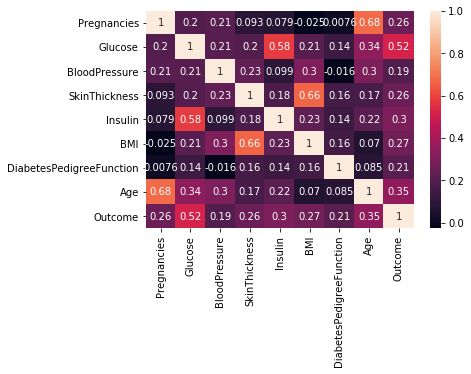

In [60]:
sns.heatmap(correlation_matrix, annot = True)

In [61]:
# Box plot and histogram

## REFERENCE

1. TYNECKI P. Predict diabetes diagnosis for Pima Female Indians with Logistic Regression. Available on: https://www.kaggle.com/ptynecki/pima-indians-diabetes-prediction-with-lr-84.
2. SCHULZ LO, CHAUDHARI LS. High-Risk Populations: The Pimas of Arizona and Mexico
Curr Obes Rep. 2015 Mar 1; 4(1): 92–98. Available on: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/
3. FRYAR CD, GU Q, OGDEN CL. Anthropometric reference data for children and adults: United States, 2007–2010. National Center for Health Statistics. Vital Health Stat 11(252). 2012.
4. VAN GAAL L., SCHEEN A. Weight Management in Type 2 Diabetes: Current and Emerging Approaches to Treatment, Diabetes Care 2015; 38(6): 1161 - 1172. Available on http://care.diabetesjournals.org/content/38/6/1161.
5. WILDING JPH. The importance of weight management in type 2 diabetes mellitus. Int J Clin Pract. 2014 Jun; 68(6): 682–691. Available on: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4238418/


# END